In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)

In [22]:
def ModelEvaluation(model,X_test, y_test):
    #1.  R2 Score
    score = model.score(X_test, y_test)
    print("R^2 Score:", score)
    
    #2. Mean Absolute Error (MAE) and Mean Squared Error (MSE)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)

    #3. RMSE is the square root of MSE. It gives an indication of the average magnitude of the errors.
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    
    #4. Residuals are the differences between the observed and predicted values. Analyzing residuals helps in understanding the model’s performance and checking for patterns.
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

## 1. Preprocessing data before Regression

In [23]:
# Read data
leap_df = pd.read_csv('./data/leap_prepared_scaled.csv')

In [24]:
leap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9561 entries, 0 to 9560
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      6230 non-null   object 
 1   year                                         6230 non-null   float64
 2   life_expectancy                              6230 non-null   float64
 3   population                                   6230 non-null   float64
 4   annual_co2_emissions_scaled                  6230 non-null   float64
 5   animal_protein_per_day_person_scaled         6230 non-null   float64
 6   fat_per_day_person_scaled                    6230 non-null   float64
 7   carbs_per_day_person_scaled                  6230 non-null   float64
 8   fertility rate_scaled                        6230 non-null   float64
 9   rural population_by_pop_scaled               6230 non-null   float64
 10  

In [25]:
# Rename column 8 and 9 to remove the spaces
leap_df.rename(columns={'fertility rate_scaled': 'fertility_rate_scaled','rural population_by_pop_scaled': 'rural_population_by_pop_scaled' }, inplace=True)

In [26]:
#check the updated column names
leap_df.columns

Index(['country', 'year', 'life_expectancy', 'population',
       'annual_co2_emissions_scaled', 'animal_protein_per_day_person_scaled',
       'fat_per_day_person_scaled', 'carbs_per_day_person_scaled',
       'fertility_rate_scaled', 'rural_population_by_pop_scaled',
       'fixed_line_subscription_per_hundred_scaled',
       'mobile_line_subscription_per_hundred_scaled'],
      dtype='object')

In [27]:
leap_df.head()

,country,year,life_expectancy,population,annual_co2_emissions_scaled,animal_protein_per_day_person_scaled,fat_per_day_person_scaled,carbs_per_day_person_scaled,fertility_rate_scaled,rural_population_by_pop_scaled,fixed_line_subscription_per_hundred_scaled,mobile_line_subscription_per_hundred_scaled
0,NaN,NaN,NaN,NaN,0.000057,0.117832,0.163895,0.768924,0.901152,0.899555,0.001935,0.0
1,NaN,NaN,NaN,NaN,0.000053,0.125285,0.175421,0.795939,0.903848,0.895044,0.001955,0.0
2,NaN,NaN,NaN,NaN,0.000064,0.119513,0.153494,0.622233,0.908038,0.890430,0.001914,0.0
3,NaN,NaN,NaN,NaN,0.000058,0.119498,0.152615,0.687172,0.909156,0.885680,0.002139,0.0
4,NaN,NaN,NaN,NaN,0.000060,0.120085,0.161563,0.680974,0.910971,0.880794,0.002132,0.0


### 1.a Drop rows with any missing values and reset the index in one line

In [28]:
leap_df_cleaned = leap_df.dropna().reset_index(drop=True)

# Remove spaces from country name
leap_df_cleaned['country'] = leap_df_cleaned['country'].str.replace(' ', '')

# Remove special characters from country name
leap_df_cleaned['country'] = leap_df_cleaned['country'].str.replace('[^a-zA-Z0-9]', '')

# save the cleaned DataFrame back to a CSV file
leap_df_cleaned.to_csv('./data/cleaned_file.csv', index=False)

In [29]:
#Storing all the country name from the cleaned data set
CountryNames = leap_df_cleaned["country"]
CountryNames = CountryNames.unique()
CountryNames

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'BosniaandHerzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'BurkinaFaso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'CentralAfricanRepublic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'CostaRica', "Coted'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'ElSalvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'FrenchPolynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy'], dtype=object)

In [30]:
leap_df_cleaned[(leap_df_cleaned["country"] == "Haiti") & (leap_df_cleaned["year"] == float(1981))]


,country,year,life_expectancy,population,annual_co2_emissions_scaled,animal_protein_per_day_person_scaled,fat_per_day_person_scaled,carbs_per_day_person_scaled,fertility_rate_scaled,rural_population_by_pop_scaled,fixed_line_subscription_per_hundred_scaled,mobile_line_subscription_per_hundred_scaled
2498,Haiti,1981.0,50.3,5760199.0,0.000087,0.078583,0.25453,0.264994,0.318067,0.765463,0.044555,0.134064


In [31]:
#Getting recent data to set as the min value for the app
Recent_data_DF = pd.DataFrame(columns=leap_df_cleaned.columns)
for cntry in CountryNames:
    max_year = leap_df_cleaned[leap_df_cleaned["country"]==cntry]["year"].max()
    rw = leap_df_cleaned[(leap_df_cleaned["country"] == cntry) & (leap_df_cleaned["year"] == max_year)]
    Recent_data_DF = pd.concat([Recent_data_DF, rw], ignore_index=True)


In [32]:
Recent_data_DF

,country,year,life_expectancy,population,annual_co2_emissions_scaled,animal_protein_per_day_person_scaled,fat_per_day_person_scaled,carbs_per_day_person_scaled,fertility_rate_scaled,rural_population_by_pop_scaled,fixed_line_subscription_per_hundred_scaled,mobile_line_subscription_per_hundred_scaled
0,Afghanistan,2020.0,62.6,38972236.0,0.000113,0.462684,0.464298,0.489453,0.111684,0.559527,0.098085,0.185839
1,Albania,2020.0,77.0,2866850.0,0.000134,0.133430,0.132254,0.094281,0.889587,0.738891,0.005233,0.000000
2,Algeria,2020.0,74.5,43451668.0,0.002558,0.661880,0.595596,0.564577,0.308779,0.198236,0.069810,0.000000
3,Angola,2020.0,62.3,33428490.0,0.000433,0.028145,0.041409,0.482339,0.385711,0.823254,0.002373,0.000002
4,AntiguaandBarbuda,2020.0,78.8,92672.0,0.000032,0.473384,0.468643,0.587468,0.074461,0.717058,0.500013,0.531117
...,...,...,...,...,...,...,...,...,...,...,...,...
69,Indonesia,2020.0,68.8,271857984.0,0.016014,0.502748,0.767406,0.431638,0.098121,0.227652,0.504429,0.011841
70,Iraq,2020.0,69.1,42556988.0,0.000161,0.526829,0.553165,0.384038,0.269251,0.173048,0.071241,0.000000
71,Ireland,2020.0,82.5,4946123.0,0.003141,0.395475,0.435533,0.698175,0.223898,0.523896,0.116671,0.323422
72,Israel,2020.0,82.4,8757487.0,0.000254,0.088835,0.234344,0.389778,0.757176,0.803161,0.014144,0.000000


In [33]:
leap_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      2899 non-null   object 
 1   year                                         2899 non-null   float64
 2   life_expectancy                              2899 non-null   float64
 3   population                                   2899 non-null   float64
 4   annual_co2_emissions_scaled                  2899 non-null   float64
 5   animal_protein_per_day_person_scaled         2899 non-null   float64
 6   fat_per_day_person_scaled                    2899 non-null   float64
 7   carbs_per_day_person_scaled                  2899 non-null   float64
 8   fertility_rate_scaled                        2899 non-null   float64
 9   rural_population_by_pop_scaled               2899 non-null   float64
 10  

### 2899 rows remaining after removing cells with empty rows

## 2.Regression

In [34]:
# Define the feature matrix (X) and the target variable (y)
X = leap_df_cleaned.drop(columns=['life_expectancy', 'country', 'year',
                                  ###Pareto Start #########
                                  'mobile_line_subscription_per_hundred_scaled',
                                  'annual_co2_emissions_scaled','rural_population_by_pop_scaled',
                                  'animal_protein_per_day_person_scaled'
                                  ###Pareto End #########
                                  ])

y = leap_df_cleaned['life_expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#Model predictors
ColNames = X_train.columns
ColNames = ColNames.to_list()
ColNames

['population',
 'fat_per_day_person_scaled',
 'carbs_per_day_person_scaled',
 'fertility_rate_scaled',
 'fixed_line_subscription_per_hundred_scaled']

### 2.a Linear Regression Model

In [36]:
# Create and train the linear regression model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# Print the coefficients and intercept
print("linear regression Model")
print("Coefficients:", LRmodel.coef_)
print("Intercept:", LRmodel.intercept_)

linear regression Model
Coefficients: [ 6.75618790e-10  1.62321222e+01 -2.21764702e+00  4.02480964e+00
 -1.41753014e+01]
Intercept: 63.19724399422385


R^2 Score: 0.06731385009338664
Mean Absolute Error (MAE): 8.187234417828833
Mean Squared Error (MSE): 95.29911998327674
Root Mean Squared Error (RMSE): 9.762126816594668


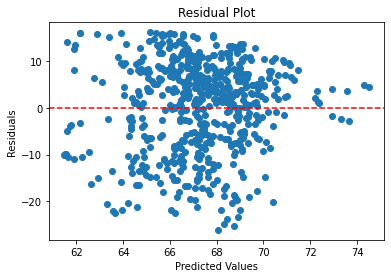

In [37]:
#LR Model Evaluation 
ModelEvaluation(LRmodel,X_test, y_test)

### 2.b DecisionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor(random_state=42)
DTmodel.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

R^2 Score: 0.7599543633778041
Mean Absolute Error (MAE): 1.8494827586206901
Mean Squared Error (MSE): 24.527155172413792
Root Mean Squared Error (RMSE): 4.952489795286184


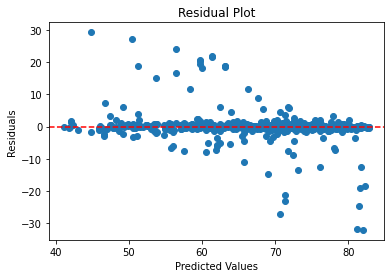

In [39]:
#DT Model Evaluation 
ModelEvaluation(DTmodel,X_test, y_test)

### 2.c RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(random_state=42)
RFmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

R^2 Score: 0.8882611084587088
Mean Absolute Error (MAE): 1.96245689655172
Mean Squared Error (MSE): 11.417150381034467
Root Mean Squared Error (RMSE): 3.378927400971271


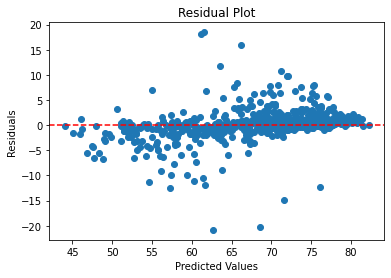

In [41]:
#Random forest Model Evaluation 
ModelEvaluation(RFmodel,X_test, y_test)

RandomForestRegressor performs the best, with the highest R² score and the lowest MSE and RMSE values. Despite a slightly higher MAE than Model 2, the difference is minimal.

R² Score: A higher R² indicates that the model explains a larger portion of the variance in the data, suggesting a better overall fit.

MAE: Lower MAE values indicate that the model's predictions are, on average, close to the actual values.

MSE: Lower MSE values indicate fewer and smaller errors overall. Because it squares the errors before averaging, it heavily penalizes larger errors.

RMSE: Like MSE, lower RMSE values indicate fewer and smaller errors, but RMSE is often preferred for interpretability since it is in the same units as the data.



## 4 Saving the CSV

In [42]:
pd.DataFrame(CountryNames).to_csv('./data/countriesList.csv', index = False)

In [43]:
pd.DataFrame(ColNames).to_csv('data/predictors.csv', index=False)

In [44]:
Recent_data_DF.to_csv('./data/Recent_data_DF.csv', index=False)

## 5 Saving the model

In [45]:
import pickle

In [46]:
data = {"model": RFmodel}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [47]:
with open('saved_model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]

In [48]:
[X_test.iloc[141]]

[population                                    6.245542e+06
 fat_per_day_person_scaled                     2.631565e-01
 carbs_per_day_person_scaled                   3.969356e-01
 fertility_rate_scaled                         3.304840e-01
 fixed_line_subscription_per_hundred_scaled    5.340689e-02
 Name: 2502, dtype: float64]

In [49]:
#test output
regressor_loaded.predict([X_test.iloc[141]])

array([51.151])